In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A lot of people did not wash their hands prior to the 19th century. Poor hygiene due to lack of hand washing caused a lot of deaths, even doctors didn't engage in handwashing before surgeries (gross). This is why a lot of patients died. During the mid 1800s, Dr. Ignaz Semmelweis wanted to explore the reason behind these deaths. So he collected data from 2 clinics in Vienna, he wanted to investigate the deaths of women who gave birth in particular. 

After taking a look at the data, it was evident that the number of deaths in clinic 1 was higher than the number of deaths in clinic 2. 

He decided to look further into this and came to the conclusion that there were a lot of medical students from clinic 1 who spent time in the autopsy room. These students would then proceed to work with women who were giving birth, this is how the harmful bacteria from corpses would affect the women. They were infected with childbed fever, which was deadly. 

This notebook contains datasets for monthly and yearly data that were collected from these 2 clinics. 

## Yearly deaths 

Let's take a look at the yearly data

In [2]:
#Read the yearly dataset
yearly_df = pd.read_csv("yearly_deaths_by_clinic.csv")

yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
# 12 rows and 4 columns
yearly_df.shape

(12, 4)

In [4]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# there are two clinics
# 1 and 2
yearly_df["clinic"].value_counts()

clinic 1    6
clinic 2    6
Name: clinic, dtype: int64

In [6]:
# let's take a look at the number of deaths for each clinic
# we can see that the number of deaths for clinic 1 is higher
yearly_df.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [7]:
# let's take a look at the values in the year column
# births and deaths were recorded from 1841 to 1846
yearly_df["year"].unique()

array([1841, 1842, 1843, 1844, 1845, 1846])

Let's divide the dataset into 2. The first is for clinic 1 and the second one is for clinic 2.

In [8]:
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]

In [9]:
clinic_1.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [10]:
clinic_2.head()

,year,births,deaths,clinic
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2


Text(0, 0.5, 'Number of Deaths')

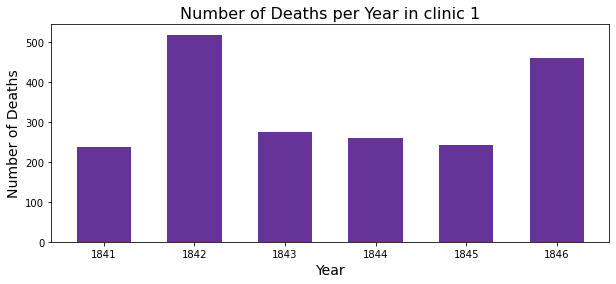

In [11]:
# visualizing the number of deaths for every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.6, color= "rebeccapurple")
plt.title("Number of Deaths per Year in clinic 1", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

The maximum number of deaths occured in the year 1842. 

Text(0, 0.5, 'Number of Deaths')

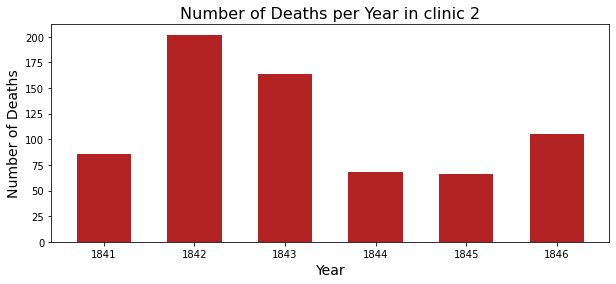

In [12]:
# Visualizing the number of deaths every year in clinic 2
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.6, color= "firebrick")
plt.title("Number of Deaths per Year in clinic 2", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

We can see that the maximum number of deaths occured in the year 1842 for clinic 2 as well. 

In [13]:
# Let's create a column for proportion of deaths for clinic 1 
clinic_1["Proportion of Deaths"] = clinic_1["deaths"] / clinic_1["births"]
clinic_1.head()

<ipython-input-13-56f556317668>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_1["Proportion of Deaths"] = clinic_1["deaths"] / clinic_1["births"]


,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [14]:
# Let's create a column for proportion of deaths for clinic 2
clinic_2["Proportion of Deaths"] = clinic_2["deaths"] / clinic_2["births"]
clinic_2.head()

<ipython-input-14-d26479df2eec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_2["Proportion of Deaths"] = clinic_2["deaths"] / clinic_2["births"]


,year,births,deaths,clinic,Proportion of Deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364


<AxesSubplot:xlabel='year', ylabel='Proportion of Deaths'>

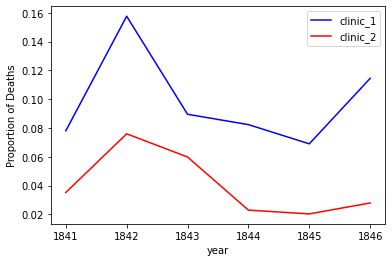

In [15]:
# let's plot the proportion of deaths for both clinics to compare
ax= clinic_1.plot(x= "year", y= "Proportion of Deaths", label= "clinic_1", color="blue")
clinic_2.plot(x= "year", y= "Proportion of Deaths", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="red")

We can see that the proportion of deaths is much higher for clinic 1. This is what we expected. 

## Monthly Deaths

Let's take a look at monthly data now

In [16]:
monthly_df = pd.read_csv("monthly_deaths.csv")

monthly_df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


This dataset does not contain the clinic numbers.

In [17]:
monthly_df.shape

(98, 3)

In [18]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [19]:
monthly_df["date"].unique()

array(['1841-01-01', '1841-02-01', '1841-03-01', '1841-04-01',
       '1841-05-01', '1841-06-01', '1841-07-01', '1841-08-01',
       '1841-09-01', '1841-10-01', '1841-11-01', '1842-01-01',
       '1842-02-01', '1842-03-01', '1842-04-01', '1842-05-01',
       '1842-06-01', '1842-07-01', '1842-08-01', '1842-09-01',
       '1842-10-01', '1842-11-01', '1842-12-01', '1843-01-01',
       '1843-02-01', '1843-03-01', '1843-04-01', '1843-05-01',
       '1843-06-01', '1843-07-01', '1843-08-01', '1843-09-01',
       '1843-10-01', '1843-11-01', '1843-12-01', '1844-01-01',
       '1844-02-01', '1844-03-01', '1844-04-01', '1844-05-01',
       '1844-06-01', '1844-07-01', '1844-08-01', '1844-09-01',
       '1844-10-01', '1844-11-01', '1844-12-01', '1845-01-01',
       '1845-02-01', '1845-03-01', '1845-04-01', '1845-05-01',
       '1845-06-01', '1845-07-01', '1845-08-01', '1845-09-01',
       '1845-10-01', '1845-11-01', '1845-12-01', '1846-01-01',
       '1846-02-01', '1846-03-01', '1846-04-01', '1846-

The birth and death values were collected between 1841 and 1849

In [20]:
# Calculating the proportion of deaths per month
monthly_df["Proportion of Deaths"]= monthly_df["deaths"] / monthly_df["births"]
monthly_df.head(5)

,date,births,deaths,Proportion of Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Dr Semmelweis made doctors wash their hands in 1847 during the summer. He wanted to see if there was a relationship between handwashing and the number of deaths. 
We can analyze the data before and after the handwashing started based on the monthly dataset. 

In [23]:
# we can see that the datatype of the date column is string
monthly_df.dtypes

date                     object
births                    int64
deaths                    int64
Proportion of Deaths    float64
dtype: object

In [24]:
# let's change the date column's data type from string to datetime
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])

Semmelweis made hand washing mandatory accross his department starting in May 1847 (https://theconversation.com/ignaz-semmelweis-the-doctor-who-discovered-the-disease-fighting-power-of-hand-washing-in-1847-135528 )
Let's take a lot at the data before and after May 1847. 

In [25]:
# Label the date at which handwashing was made mandatory to "start_handwashing"
start_handwashing = pd.to_datetime('1847-05-01')

In [26]:
# Split monthly into before and after handwashing_start
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

## Before handwashing

Text(0, 0.5, 'Proportion of Deaths')

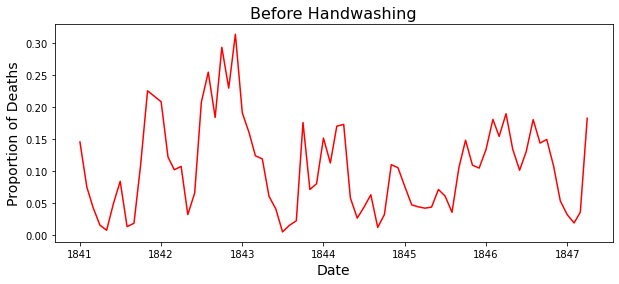

In [27]:
fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["Proportion of Deaths"]
plt.plot(x, y, color= "red")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

There are a lot of spikes in the proportion of deaths before handwashing. 

## After handwashing

Text(0, 0.5, 'Proportion of Deaths')

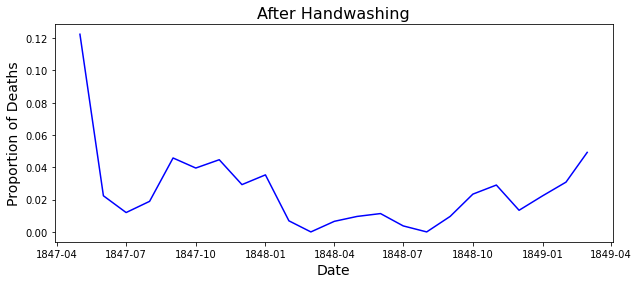

In [28]:
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["Proportion of Deaths"]
plt.plot(x, y, color= "blue")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

It's evident that there is a steady decline in the proportion of deaths after handwashing. There is a correlation between handwashing and the proportion of deaths, this pattern was expected. 
From 1847 (May), we can see hopw rapidly the proportion decreased. There are a few spikes, but they're not as large as the ones we could see from the previous graph. 

Let's calculate the difference between mean proportions of deaths before and after handwashing 

In [29]:
before_washing["Proportion of Deaths"].mean()

0.10481799598265128

In [30]:
after_washing["Proportion of Deaths"].mean()

0.025500140510062462

In [32]:
after_washing["Proportion of Deaths"].mean() - before_washing["Proportion of Deaths"].mean()

-0.07931785547258882

The negative sign indicates a decrease. The percentage decreased by 8%. That is a significant difference after handwashing 